In [1]:
# ========== 1. Import Required Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

In [2]:
# ========== 2. Load Datasets ==========
# Replace paths if your data folder is different
df1 = pd.read_csv("../data/raw/coin_gecko_2022-03-16.csv")

print("Dataset 1 Shape:", df1.shape)

Dataset 1 Shape: (500, 9)


In [3]:
df2 = pd.read_csv("../data/raw/coin_gecko_2022-03-17.csv")

print("Dataset 2 Shape:", df2.shape)

Dataset 2 Shape: (500, 9)


In [4]:
# ========== 3. Merge and Combine Datasets ==========
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)
print("Combined Dataset Shape:", df.shape)

Combined Dataset Shape: (1000, 9)


In [5]:
# ========== 4. Quick Overview ==========
display(df.head())

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


None

In [7]:
display(df.describe(include='all'))

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
count,1000,1000,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03,1000
unique,506,503,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Oxygen,RUNE,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-16
freq,2,4,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,NaN,NaN,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09,NaN
std,NaN,NaN,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10,NaN
min,NaN,NaN,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,NaN
25%,NaN,NaN,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08,NaN
50%,NaN,NaN,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,NaN
75%,NaN,NaN,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08,NaN


In [8]:
display(df.dtypes)

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [9]:
# ========== 5. Handle Missing Values ==========
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Missing Values Before Cleaning:
 coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


In [10]:
df = df.drop_duplicates()

In [11]:
# Fill missing numeric values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [12]:
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64


In [13]:
# ========== 6. Data Type Correction ==========

# Convert numeric columns in a loop
numeric_cols = ['price', '24h_volume', 'mkt_cap']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')  
df['date'] = df['date'].dt.strftime('%d-%m-%Y')

In [15]:
# Check dates after conversion
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,16-03-2022
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,16-03-2022
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,16-03-2022
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,16-03-2022
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,16-03-2022


In [16]:
# ========== 7. Add Basic Liquidity Proxy Features ==========
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']
df['price_change_24h'] = df['24h'] * df['price'] / 100

In [17]:
# Check missing values after feature engineering
print("\nMissing Values After Feature Engineering:\n", df.isnull().sum())


Missing Values After Feature Engineering:
 coin                0
symbol              0
price               0
1h                  0
24h                 0
7d                  0
24h_volume          0
mkt_cap             0
date                0
liquidity_ratio     0
price_change_24h    0
dtype: int64


In [18]:
# ========== 8. Summary After Feature Creation ==========
display(df.describe())

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio,price_change_24h
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,6.561060e+02,0.009697,0.023683,0.023366,2.873441e+08,3.755304e+09,0.103574,1.383848e-01
std,4.584655e+03,0.026842,0.059098,0.228869,2.760286e+09,3.803783e+10,0.365656,1.119339e+00
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,0.000000,-3.272726e+00
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.842994e+06,1.157776e+08,0.008833,4.474824e-09
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,0.034154,7.817336e-05
75%,7.232500e+00,0.019000,0.035000,0.036000,3.923430e+07,5.948436e+08,0.088351,1.326500e-03
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,5.948545,1.607474e+01


In [19]:
# ========== 9. Save Cleaned Interim Data ==========
df.to_csv("../data/processed/merged_clean.csv", index=False)
print("✅ Cleaned dataset saved to data/processed/merged_clean.csv")

✅ Cleaned dataset saved to data/processed/merged_clean.csv


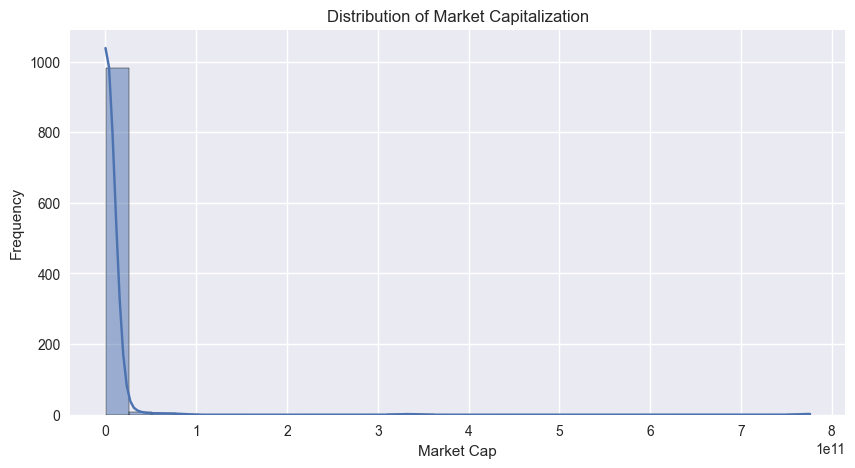

In [20]:
# ========== 10. Exploratory Data Analysis ==========
# --- Distribution of Market Cap ---
plt.figure(figsize=(10, 5))
sns.histplot(df['mkt_cap'], bins=30, kde=True)
plt.title("Distribution of Market Capitalization")
plt.xlabel("Market Cap")
plt.ylabel("Frequency")
plt.show()

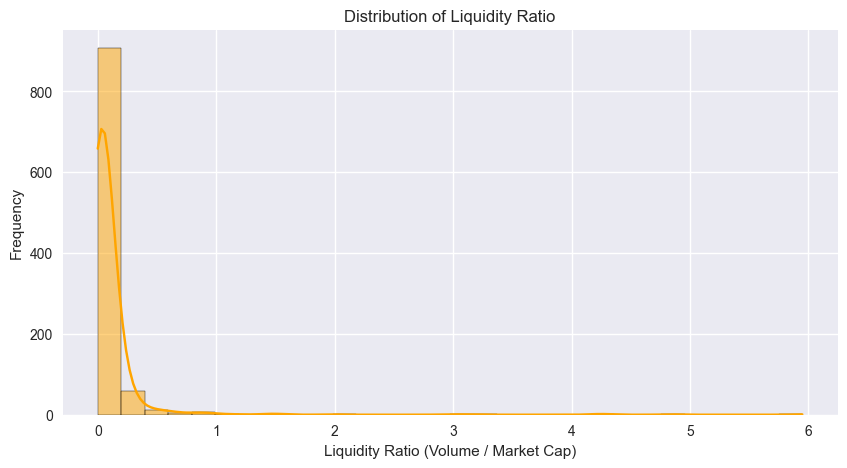

In [21]:
# --- Distribution of Liquidity Ratio ---
plt.figure(figsize=(10, 5))
sns.histplot(df['liquidity_ratio'], bins=30, kde=True, color='orange')
plt.title("Distribution of Liquidity Ratio")
plt.xlabel("Liquidity Ratio (Volume / Market Cap)")
plt.ylabel("Frequency")
plt.show()

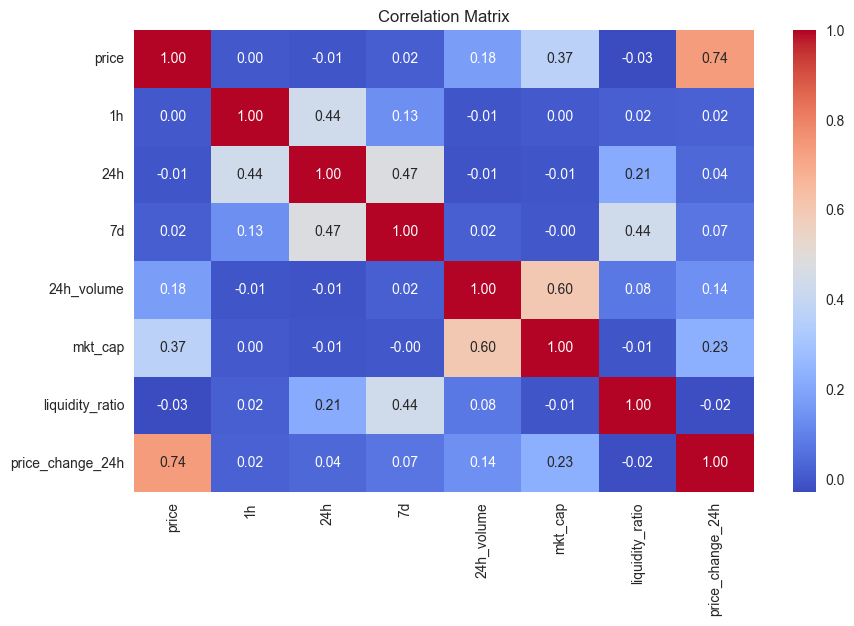

In [22]:
# --- Correlation Heatmap ---
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

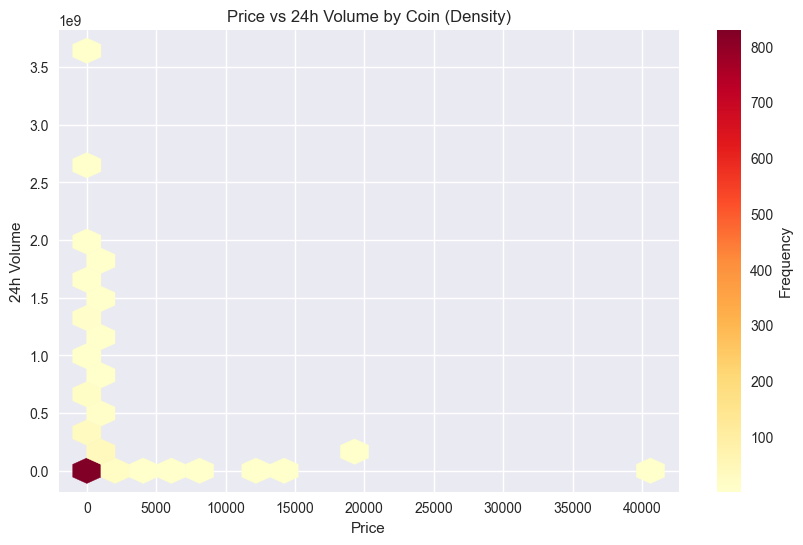

In [23]:
# --- Price vs Volume Relationship ---
plt.figure(figsize=(10, 6))

# Remove NaN and infinite values
plot_df = df[(np.isfinite(df['price'])) & (np.isfinite(df['24h_volume']))].copy()

# Remove extreme outliers (keep data within 99th percentile)
q99_price = plot_df['price'].quantile(0.99)
q99_volume = plot_df['24h_volume'].quantile(0.99)
plot_df = plot_df[(plot_df['price'] <= q99_price) & (plot_df['24h_volume'] <= q99_volume)]

plt.hexbin(plot_df['price'], plot_df['24h_volume'], gridsize=20, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Frequency')
plt.title("Price vs 24h Volume by Coin (Density)")
plt.xlabel("Price")
plt.ylabel("24h Volume")
plt.show()

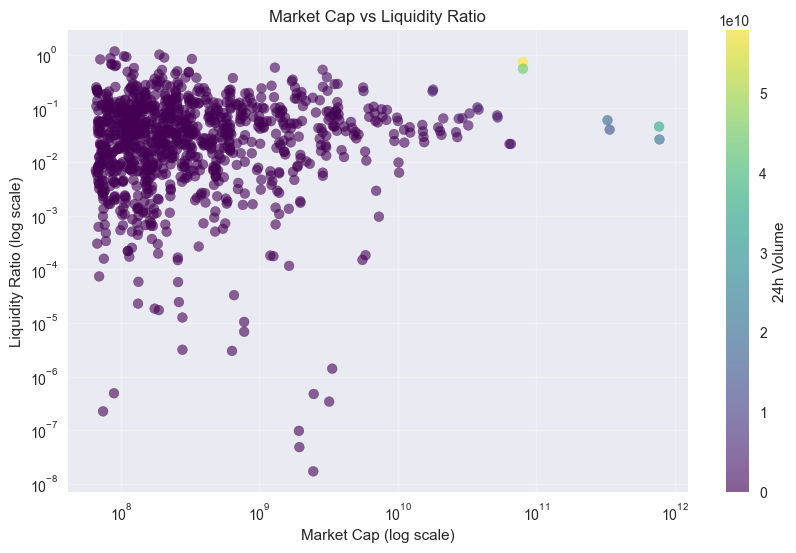

In [24]:
# --- Market Cap vs Liquidity Ratio ---
plt.figure(figsize=(10, 6))

plot_df = df[(np.isfinite(df['liquidity_ratio'])) & (np.isfinite(df['mkt_cap']))].copy()
q99_liquidity = plot_df['liquidity_ratio'].quantile(0.99)
plot_df = plot_df[plot_df['liquidity_ratio'] <= q99_liquidity]

plt.scatter(plot_df['mkt_cap'], plot_df['liquidity_ratio'], alpha=0.6, s=50, c=plot_df['24h_volume'], cmap='viridis')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='24h Volume')
plt.title("Market Cap vs Liquidity Ratio")
plt.xlabel("Market Cap (log scale)")
plt.ylabel("Liquidity Ratio (log scale)")
plt.grid(True, alpha=0.3)
plt.show()